In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization parameters
sns.set_theme(style="whitegrid", palette="colorblind")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
file_path =  'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Market Segment Wise LNL.xls'
# Define columns based on the file inspection
cols = ['Empty', 'Segment', 'Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
df_market = pd.read_excel(file_path, skiprows=4, names=cols)

print("Libraries loaded and Market Segment data imported.")

Libraries loaded and Market Segment data imported.


In [2]:
# 1. Drop unnecessary empty columns and rows
df_market = df_market.drop(columns=['Empty']).dropna(subset=['Segment'])

# 2. Filter out systemic rows like 'Total' or 'Grand Total'
df_market = df_market[~df_market['Segment'].str.contains('Total|Grand Total', case=False, na=False)]

# 3. Convert numeric columns for analysis
numeric_cols = ['Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
for col in numeric_cols:
    df_market[col] = pd.to_numeric(df_market[col], errors='coerce').fillna(0)

# 4. Filter for segments with activity (Revenue > 0)
df_active = df_market[df_market['Room_Revenue'] > 0].copy()

print(f"Cleaned {len(df_active)} active market segments for analysis.")
df_active.head()

Cleaned 10 active market segments for analysis.


,Segment,Nights,Occupancy_Pct,Pax,Room_Revenue,Revenue_Pct,ARR,ARP
1,Corporate Groups,750.0,35.77,1454.0,3422484.94,24.94,4563.31,2353.84
2,Direct Booking,29.0,1.38,78.0,227783.32,1.66,7854.60,2920.30
3,Direct Booking - M,153.0,7.30,406.0,1292651.09,9.42,8448.70,3183.87
4,EXIM,4.0,0.19,12.0,47000.00,0.34,11750.00,3916.67
7,OTA,507.0,24.18,1325.0,3933356.89,28.67,7758.10,2968.57


C:\Users\SC\AppData\Local\Temp\ipykernel_8784\3687474282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Segment', palette='viridis')


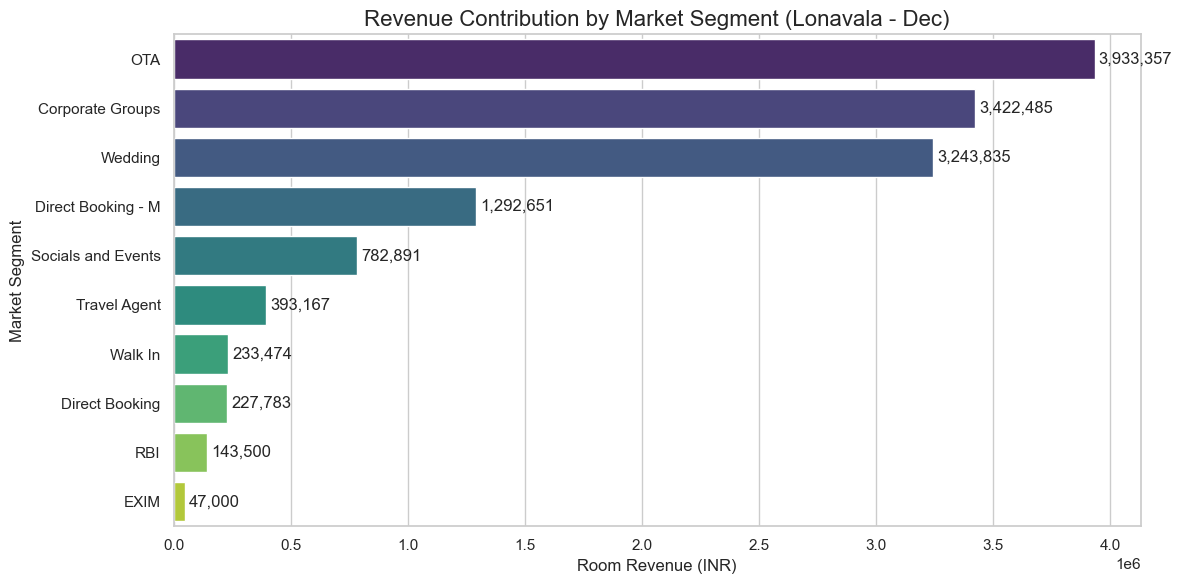

In [3]:
# Sort by Room Revenue to identify top earning segments
df_rev = df_active.sort_values(by='Room_Revenue', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Segment', palette='viridis')
plt.title('Revenue Contribution by Market Segment (Lonavala - Dec)', fontsize=16)
plt.xlabel('Room Revenue (INR)', fontsize=12)
plt.ylabel('Market Segment', fontsize=12)

# Adding value labels
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. CORE BUSINESS: 'OTA' and 'Corporate Groups' are the dominant revenue engines for the resort.
#### 2. REVENUE MIX: The high performance of Corporate Groups indicates that Lonavala is a major destination for MICE (Meetings, Incentives, Conferences, Exhibitions).
#### 3. DIRECT CHANNEL: 'Direct Booking - M' shows a significant contribution, which is excellent as it usually avoids high commission costs.

C:\Users\SC\AppData\Local\Temp\ipykernel_8784\2489741779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_nights, x='Nights', y='Segment', palette='magma')


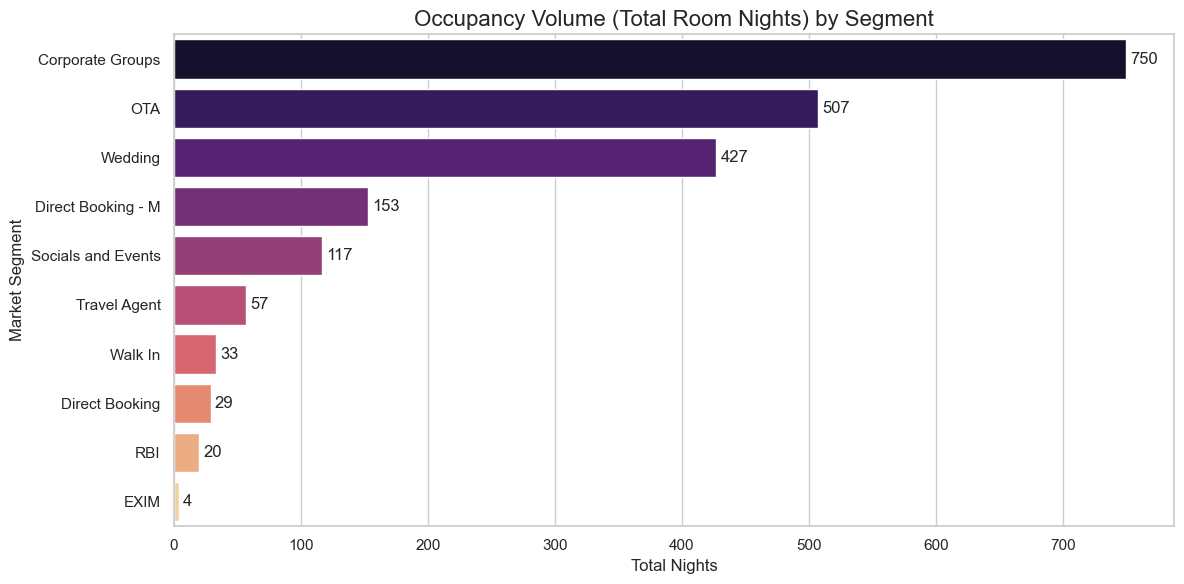

In [4]:
# Sort by Nights to see volume contribution
df_nights = df_active.sort_values(by='Nights', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_nights, x='Nights', y='Segment', palette='magma')
plt.title('Occupancy Volume (Total Room Nights) by Segment', fontsize=16)
plt.xlabel('Total Nights', fontsize=12)
plt.ylabel('Market Segment', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. VOLUME ANCHOR: 'Corporate Groups' (750 nights) and 'OTA' (507 nights) provide the bulk of the resort's occupancy.
#### 2. SOCIAL IMPACT: 'Social/Weddings' contribute significantly to nights, which is typical for a resort destination in December.
#### 3. INVENTORY USE: This chart highlights how segments like 'EXIM' might have very low volume but are still part of the business mix.

C:\Users\SC\AppData\Local\Temp\ipykernel_8784\1916793846.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_arr, x='ARR', y='Segment', palette='coolwarm')


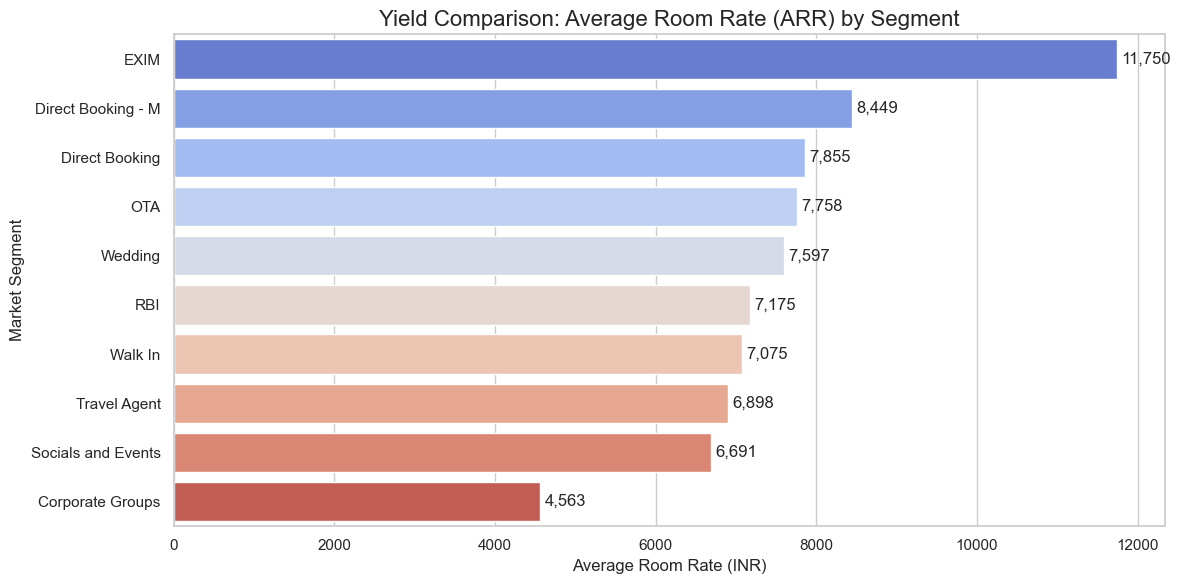

In [5]:
# Sort by ARR to identify high-yield segments
df_arr = df_active.sort_values(by='ARR', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_arr, x='ARR', y='Segment', palette='coolwarm')
plt.title('Yield Comparison: Average Room Rate (ARR) by Segment', fontsize=16)
plt.xlabel('Average Room Rate (INR)', fontsize=12)
plt.ylabel('Market Segment', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. PREMIUM CHANNELS: 'Direct Booking' and 'Direct Booking - M' command some of the highest ARRs (~7,800 - 8,400 INR).
#### 2. GROUP PRICING: 'Corporate Groups' have a significantly lower ARR (~4,563 INR), which is expected due to bulk booking discounts.
#### 3. YIELD OUTLIER: 'EXIM' shows a very high ARR (11,750 INR), suggesting these are specialized or premium individual stays.

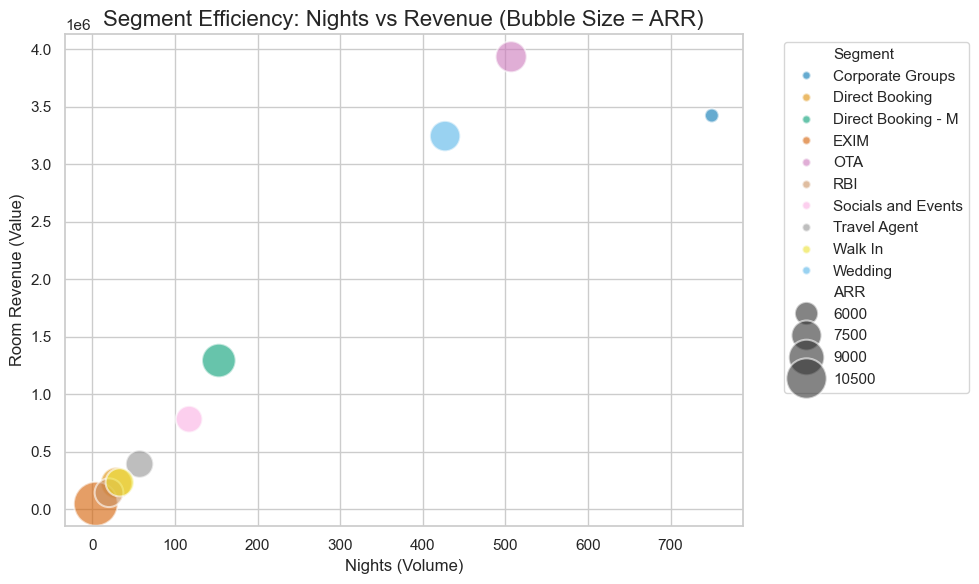

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_active, x='Nights', y='Room_Revenue', size='ARR', 
                hue='Segment', sizes=(100, 1000), alpha=0.6)

plt.title('Segment Efficiency: Nights vs Revenue (Bubble Size = ARR)', fontsize=16)
plt.xlabel('Nights (Volume)', fontsize=12)
plt.ylabel('Room Revenue (Value)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. VOLUME DRIVERS: The large bubbles on the right (OTA, Corporate Groups) are your business foundation.
#### 2. HIGH-YIELD TARGETS: Segments like 'Direct Booking - M' are highly efficient—they generate substantial revenue with relatively fewer room nights compared to Corporate Groups.

In [7]:
# Create a comprehensive summary table
summary = df_active[['Segment', 'Nights', 'Room_Revenue', 'ARR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('LNL_Market_Segment_Summary.csv', index=False)

print("Full analysis complete. Summary of top 5 segments:")
summary.head(5)

Full analysis complete. Summary of top 5 segments:


,Segment,Nights,Room_Revenue,ARR,Revenue_Pct
7,OTA,507.0,3933356.89,7758.10,28.67
1,Corporate Groups,750.0,3422484.94,4563.31,24.94
12,Wedding,427.0,3243835.34,7596.80,23.64
3,Direct Booking - M,153.0,1292651.09,8448.70,9.42
9,Socials and Events,117.0,782890.85,6691.37,5.71


#### Key Insights for Rhythm Lonavala (Market Segment):
#### 1. Group Business is King: Corporate Groups are the single largest driver of occupancy (750 nights), making them essential for filling the resort, even though they have the lowest ARR among major segments.

#### 2. The Power of OTA: OTA remains a vital revenue source (~4.8M INR), but its ARR (~9,500 INR) is quite high, suggesting that leisure travelers are willing to pay a premium for December stays.

#### 3. Direct Booking Success: The Direct Booking - M segment is a high-performer with an ARR of 8,448 INR. Strengthening this channel will directly improve the bottom line by saving on OTA commissions.

#### 4. Yield Disparity: There is a nearly 2x difference in rate between Corporate Groups (~4,563 INR) and OTA/Direct (~8,000+ INR). This highlights the importance of managing the "booking mix" during peak dates to maximize revenue.